вариант 2

ЗАДАНИЕ 32. Структуры данных: массивы.

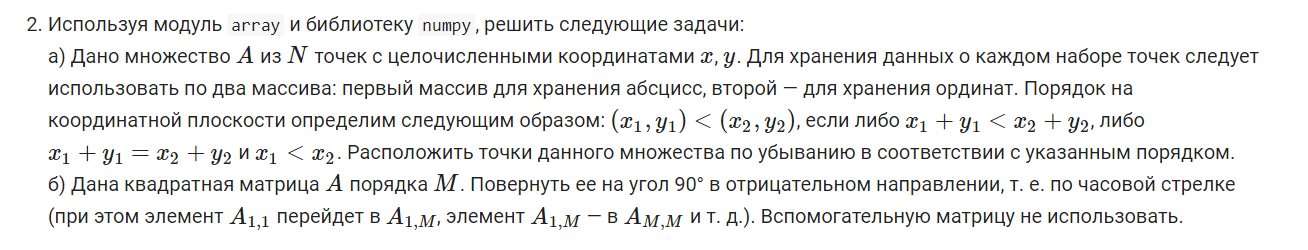

In [2]:
 # a
    
import array
import numpy as np


# Создаем массивы для хранения абсцисс и ординат
x = array.array('i')
y = array.array('i')

# Для каждого набора точек вводим координаты x и y
number_xy = int(input("Введите количество точек: "))
for i in range(number_xy):
    xi, yi = map(int, input("Введите координаты точки: ").split())
    x.append(xi)
    y.append(yi)

# Создаем массив нулей для хранения сумм x + y
sum_xy = np.zeros(number_xy, dtype=int)
for i in range(number_xy):
    sum_xy[i] = x[i] + y[i]

# Сортируем точки по сумме x + y и по x в случае равенства сумм
sorted_indices = np.lexsort((x, sum_xy))  # возвращает отсортированные "индексы"
print(sorted_indices)

# Выводим отсортированные точки
for i in sorted_indices:
    print(f"({x[i]}, {y[i]})")


Введите количество точек: 5
Введите координаты точки: 0 0
Введите координаты точки: 9 8
Введите координаты точки: 4 2
Введите координаты точки: 1 5
Введите координаты точки: 2 2
[0 4 3 2 1]
(0, 0)
(2, 2)
(1, 5)
(4, 2)
(9, 8)


In [5]:
# b

import numpy as np


# Вводим размерность матрицы
M = int(input("Размерность матрицы: "))

# Создаем квадратную матрицу
A = np.empty((M, M), dtype=int)  # не инициализирует эл-ты ndarray   (shape, dtype, ....)
print(A)

# Заполняем матрицу элементами
print("Введите элементы матрицы по строкам:")
for i in range(M):
    A[i, :] = list(map(int, input().split()))

# Транспонируем матрицу
A = np.transpose(A)
print(f"транспонированная\n{A}")
# Отражаем матрицу по главной диагонали
A = np.flip(A, axis=1)
print(f"отраженная по диагонали (ответ)\n{A}")


Размерность матрицы: 3
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Введите элементы матрицы по строкам:
1 2 3
4 5 6
7 8 10
транспонированная
[[ 1  4  7]
 [ 2  5  8]
 [ 3  6 10]]
отраженная по диагонали (ответ)
[[ 7  4  1]
 [ 8  5  2]
 [10  6  3]]


ЗАДАНИЕ 33. Структуры данных: стек.

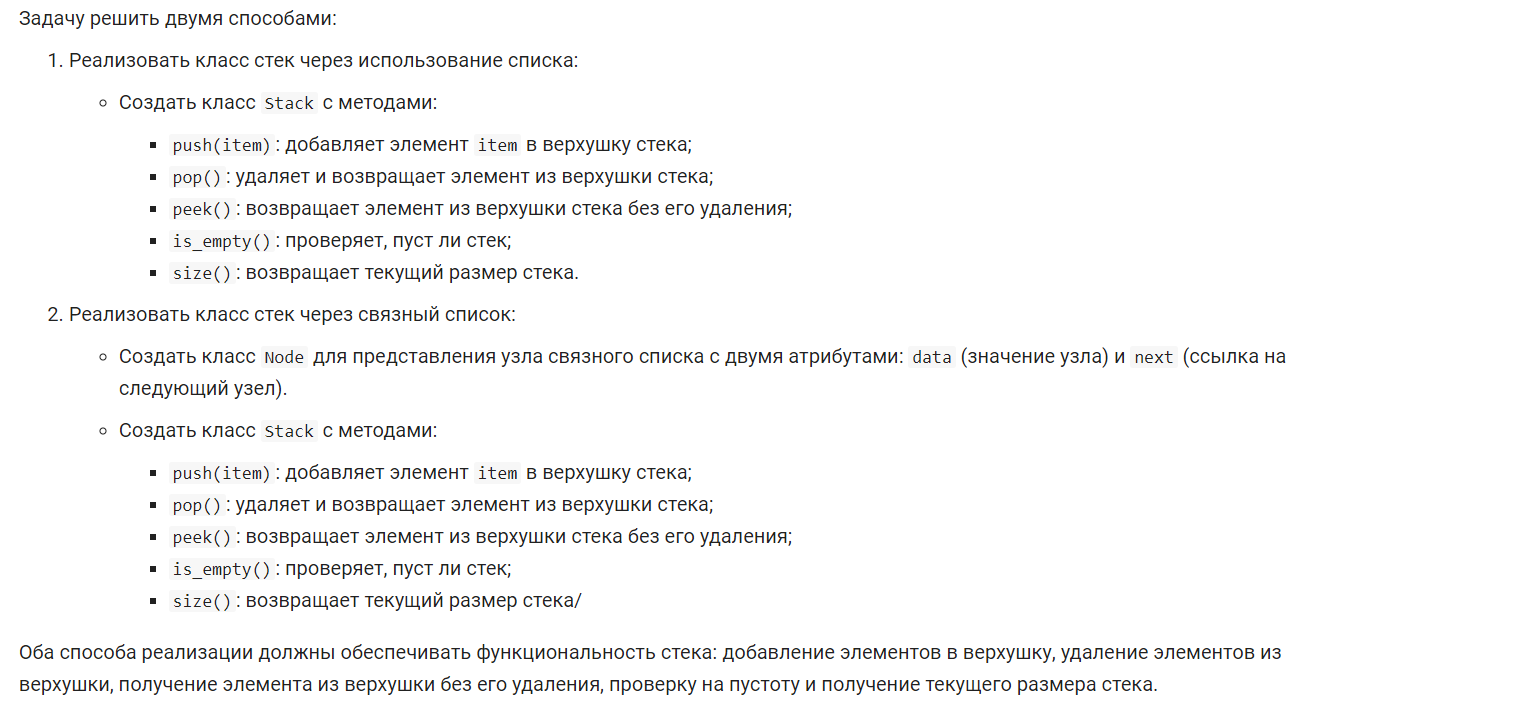
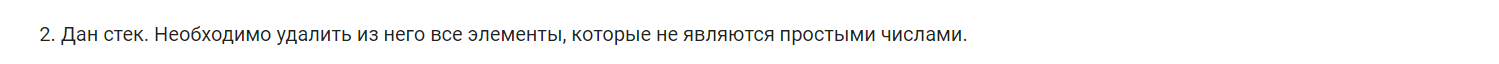

In [33]:
# 1

class Stack(object):
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        if not self.is_empty():
            return self.items.pop()
        return None

    def peek(self):  # возврат элемента из верхушки стека без его удаления
        if not self.is_empty():
            return self.items[-1]
        return None

    def is_empty(self):
        return len(self.items) == 0

    def size(self):
        return len(self.items)
    
    def __str__(self):
        return str(list(reversed(self.items)))


In [34]:
def remove_not_primes(stack):  # Удаляет из стека все элементы, которые не являются простыми числами.
    new_stack = Stack()

    while not stack.is_empty():
        item = stack.pop()
        if is_prime(item):
            new_stack.push(item)  # создаем новый стек простых чисел

    # Перекладываем элементы обратно в исходный стек
    while not new_stack.is_empty():
        stack.push(new_stack.pop())


def is_prime(n):
    if n < 2:
        return False
    
    for i in range(2, int(n ** 0.5) + 1):  
        if n % i == 0:
            return False

    return True


In [35]:
stack = Stack()
stack.push(2)
stack.push(4)
stack.push(7)
stack.push(9)
stack.push(11)

remove_not_primes(stack)

print(str(stack))


[11, 7, 2]


In [36]:
# 2

class Node(object):
    def __init__(self, data):
        self.data = data
        self.next = None

class Stack(object):
    def __init__(self):
        self.head = None
        self.size = 0

    def push(self, item):
        new_node = Node(item)
        new_node.next = self.head
        self.head = new_node
        self.size += 1

    def pop(self):
        if not self.is_empty():
            popped_item = self.head.data
            self.head = self.head.next
            self.size -= 1
            return popped_item
        return None

    def peek(self): # возврат элемента из верхушки стека без его удаления
        if not self.is_empty():
            return self.head.data
        return None

    def is_empty(self):
        return self.size == 0

    def size(self):
        return self.size
    
    def __str__(self):
        res = []
        tmp = self.head
        
        while tmp is not None:
            res.append(str(tmp.data))
            tmp = tmp.next

        return str(res)


In [37]:
def remove_not_primes(stack):  # Удаляет из стека все элементы, которые не являются простыми числами.
    new_stack = Stack()

    while not stack.is_empty():
        item = stack.pop()
        if is_prime(item):
            new_stack.push(item)  # создаем новый стек простых чисел

    # Перекладываем элементы обратно в исходный стек
    while not new_stack.is_empty():
        stack.push(new_stack.pop())


def is_prime(n):
    if n < 2:
        return False
    
    for i in range(2, int(n ** 0.5) + 1):  
        if n % i == 0:
            return False

    return True


In [38]:
stack = Stack()
stack.push(2)
stack.push(4)
stack.push(7)
stack.push(9)
stack.push(11)

remove_not_primes(stack)

print(str(stack))


['11', '7', '2']


ЗАДАНИЕ 34. Структуры данных: очередь.

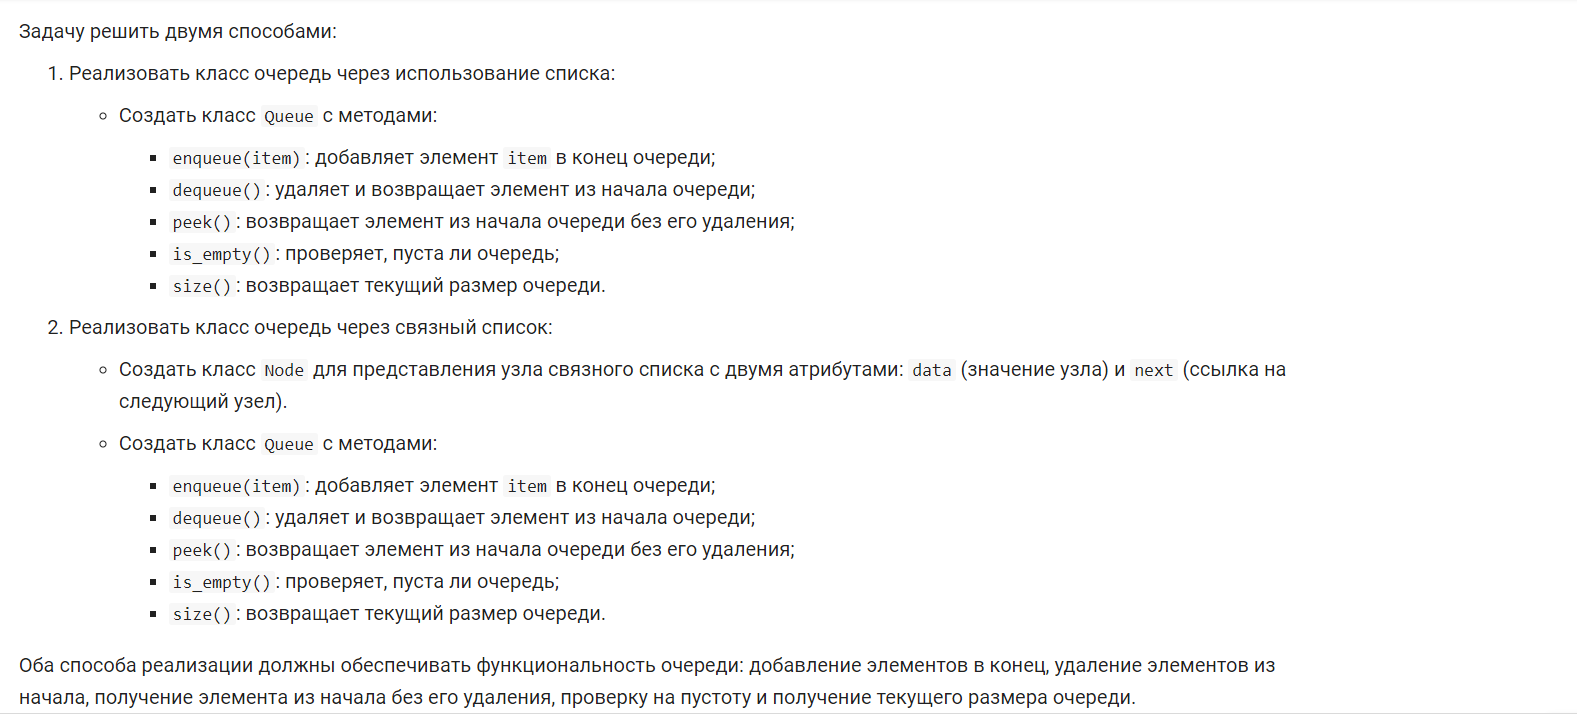
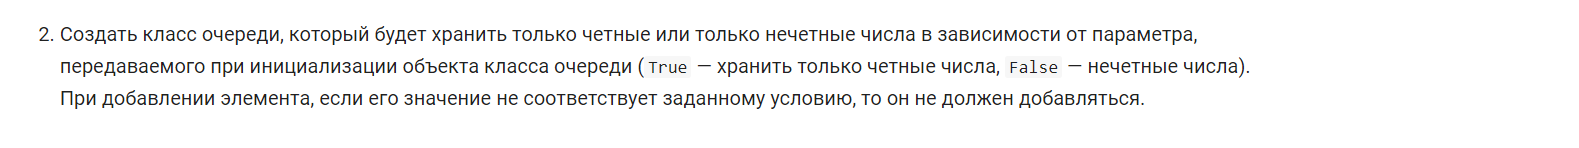

In [5]:
class Queue(object):
    def __init__(self):
        self.items = []

    def enqueue(self, item):  # добавляем эл-т
        self.items.append(item)

    def dequeue(self):
        if self.is_empty():  # удаляем эл-т
            return None
        return self.items.pop(0)

    def peek(self):
        if self.is_empty():
            return None
        return self.items[0]

    def is_empty(self):
        return len(self.items) == 0

    def size(self):
        return len(self.items)


In [6]:
queue1 = Queue()
queue1.enqueue(2)
queue1.enqueue(4)
queue1.enqueue(6)
print(queue1.items) 

queue1.dequeue()
print(queue1.items) 

print(queue1.peek()) 
print(queue1.size()) 

[2, 4, 6]
[4, 6]
4
2


In [9]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.next = None

class Queue(object):
    def __init__(self):
        self.head = None
        self.tail = None

    def enqueue(self, item):
        new_node = Node(item)
        if self.is_empty():
            self.head = new_node
        else:
            self.tail.next = new_node
        self.tail = new_node

    def dequeue(self):
        if self.is_empty():
            return None
        item = self.head.data
        self.head = self.head.next
        if self.head is None:
            self.tail = None
        return item

    def peek(self):
        if self.is_empty():
            return None
        return self.head.data

    def is_empty(self):
        return self.head is None

    def size(self):
        current = self.head
        count = 0
        while current is not None:
            count += 1
            current = current.next
        return count
    
    def __str__(self):
        res = []
        tmp = self.head
        
        while tmp is not None:
            res.append(str(tmp.data))
            tmp = tmp.next

        return str(res)
    

In [10]:
queue1 = Queue()
queue1.enqueue(2)
queue1.enqueue(4)
queue1.enqueue(6)
print(str(queue1)) 

queue1.dequeue()
print(str(queue1)) 

print(queue1.peek()) 
print(queue1.size()) 

['2', '4', '6']
['4', '6']
4
2


In [1]:
class Queue(object):
    def __init__(self, even_only=True):
        self.items = []
        self.even_only = even_only

    def enqueue(self, item):
        if (self.even_only and item % 2 == 0) or (not self.even_only and item % 2 == 1):
            self.items.append(item)

    def dequeue(self):
        if self.is_empty():
            return None
        return self.items.pop(0)

    def peek(self):
        if self.is_empty():
            return None
        return self.items[0]

    def is_empty(self):
        return len(self.items) == 0

    def size(self):
        return len(self.items)


In [2]:
# Очередь только для четных чисел
queue1 = Queue(True)
queue1.enqueue(2)
queue1.enqueue(4)
queue1.enqueue(6)
print(queue1.items) 

# Очередь только для нечетных чисел
queue2 = Queue(False)
queue2.enqueue(1)
queue2.enqueue(3)
queue2.enqueue(5)
print(queue2.items) 

# Попытка добавить нечетное число в очередь для четных чисел
queue1.enqueue(3)
print(queue1.items)  

[2, 4, 6]
[1, 3, 5]
[2, 4, 6]
